**AIVLE School 미니프로젝트**
### **통신 서비스 이용 고객의 <span style="color:darkgreen">이탈 여부</span> 예측 문제**
---

<br>

#### **<span style="color:red">[미션 안내]</span>**
* 고객 관련 데이터를 분석한 후 고객의 서비스 중단 또는 경쟁업체로의 이탈 여부를 예측하는 머신러닝, 딥러닝 모델을 만들고 결과를 예측하세요.

#### **<span style="color:red">[유의 사항]</span>**
* 각 문항의 답안코드는 반드시 '#여기에 답안코드를 작성하세요'로 표시된 cell에 작성해야 합니다.
* 제공된 cell을 추가/삭제하고 다른 cell에 답안코드를 작성 시 채점되지 않습니다.
* 반드시 문제에 제시된 가이드를 읽고 답안 작성하세요.
* 문제에 변수명이 제시된 경우 반드시 해당 변수명을 사용하세요.
* 문제와 데이터는 제3자에게 공유하거나 개인적인 용도로 사용하는 등 외부로 유출할 수 없으며 유출로 인한 책임은 응시자 본인에게 있습니다.

<br>

### 1. scikit-learn 패키지는 머신러닝 교육을 위한 최고의 파이썬 패키지입니다.
### scikit-learn를 별칭(alias) sk로 임포트하는 코드를 작성하고 실행하세요.

In [139]:
# 여기에 답안코드를 작성하세요.

import sklearn as sk

<br>

### 2. Pandas를 사용할 수 있도록 별칭(alias)을 pd로 해서 불러오세요.

In [140]:
# 여기에 답안코드를 작성하세요.

import pandas as pd

<br>

### 3. 모델링을 위해 분석 및 처리할 데이터 파일을 읽어오려고 합니다.
### Pandas함수로 데이터 파일을 읽어 데이터프레임 변수명 df에 할당하는 코드를 작성하세요.
* churn_data.csv 파일을 읽어 데이터 프레임 변수명 df에 할당하세요.

In [141]:
# 여기에 답안코드를 작성하세요.


df = pd.read_csv('churn_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,...,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,...,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,...,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<br>

### 4. df에서 불필요한 customerID 컬럼을 삭제하고 df1에 저장하세요.

In [142]:
# 여기에 답안코드를 작성하세요.

drop_col = 'customerID'

df1 = df.drop(columns=drop_col)

df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,Male,0.0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0.0,No,No,2,Yes,No,DSL,Yes,Yes,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0.0,No,No,45,No,No phone service,DSL,Yes,No,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0.0,No,No,2,Yes,No,Fiber optic,No,No,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<br>

### 5. df1의 TotalCharges 컬럼의 타입을 float로 변경하세요.
* TotalCharge의 컬럼 타입을 확인하는 코드를 작성하세요.
* ' ' 값을 0으로 변환하고 컬럼 타입을 float로 변경하세요.
* 전처리 후 데이터를 df2에 저장하세요.

In [143]:
# 여기에 답안코드를 작성하세요.

print(df1['TotalCharges'].dtypes) # object

df1['TotalCharges'] = df1['TotalCharges'].replace(' ',0)

df1['TotalCharges'] = df1['TotalCharges'].astype(float)

df2 = df1.copy()

#df2.info() 면경된 것을 확인 

object


<br>

### 6. df2에서 churn 컬럼의 데이터별 개수를 확인하는 코드를 작성하고 df2를 df3에 저장하세요.
### df2의 churn 컬럼의 Yes, No를 각각 1, 0으로 변환한 후 df의 churn 컬럼에 저장하세요.

In [144]:
# 여기에 답안코드를 작성하세요.

print(df2['Churn'].value_counts())
df3 =df2.copy()

df3['Churn'] = df2['Churn'].replace(['Yes','No'],[1,0])

# print(df3['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_19744\1945752871.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['Churn'] = df2['Churn'].replace(['Yes','No'],[1,0])


<br>

### 7. df3의 모든 컬럼에 대해 결측치를 확인하는 코드를 작성하고 결측치를 처리하세요.
* df3을 df4에 저장하세요.
* df4의 결측치가 40% 이상인 컬럼은 컬럼을 삭제하세요.
* df4의 결측치가 40% 미만인 컬럼은 결측치가 있는 row를 삭제하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
df4 = df3.copy()

df4.info() # 전체 7034개 중 DeviceProtection 만 결측치가 너무 많음 

drop_col = 'DeviceProtection'
df4 = df4.drop(columns=drop_col)

# drop_idx = df4[df4.isna()].index
#print(drop_idx)
df4 = df4.dropna()

#print(df4.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7034 non-null   object 
 1   SeniorCitizen     7042 non-null   float64
 2   Partner           7043 non-null   object 
 3   Dependents        7041 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7040 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  3580 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7042 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7042 non-null   object 


In [146]:
df4.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,Male,0.0,No,No,34,Yes,No,DSL,Yes,No,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0.0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0.0,No,No,45,No,No phone service,DSL,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0.0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,0.0,No,No,8,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1


<br>

### 8. df4에서 SeniorCitizen 컬럼을 bar 차트로 확인해보고 불균형을 확인해보세요. 
### SeniorCitizen 컬럼은 불균형이 심하므로 삭제하세요.

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,Male,No,No,34,Yes,No,DSL,Yes,No,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,45,No,No phone service,DSL,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,No,No,8,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1


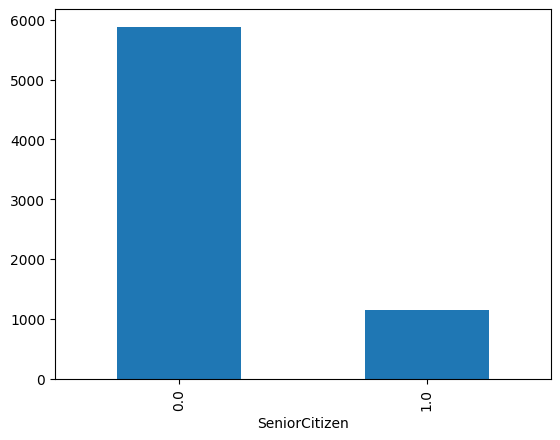

In [147]:
# 여기에 답안코드를 작성하세요.


df4['SeniorCitizen'].value_counts().plot(kind='bar')

df4 = df4.drop(columns='SeniorCitizen')
df4.head()


<br>

### 9. df4에서 다음의 가이드에 따라 데이터를 시각화 해보세요.
* tenure (서비스 사용기간)에 대해 히스토그램으로 시각화 하세요.
* tenure를 x 값으로 churn을 hue 값으로 사용하여 kdeplot으로 시각화 하고 '서비스 사용기간이 길어질 수록 이탈이 적다'에 대해 'O'인지 'X'인지 출력하세요.
* 'tenure','MonthlyCharges','TotalCharges' 컬럼간의 상관관계를 확인하여 heatmap으로 시각화하고 가장 높은 상관계수 값을 출력하세요.

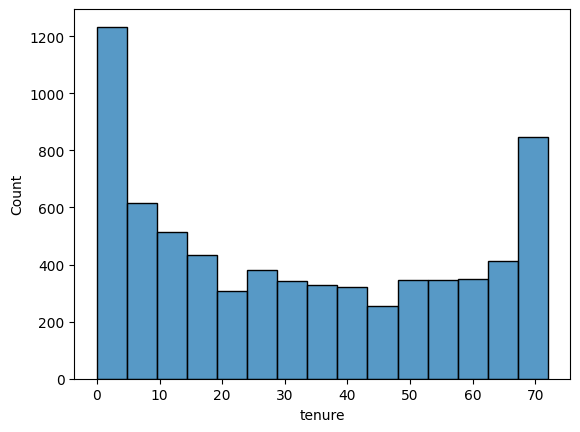

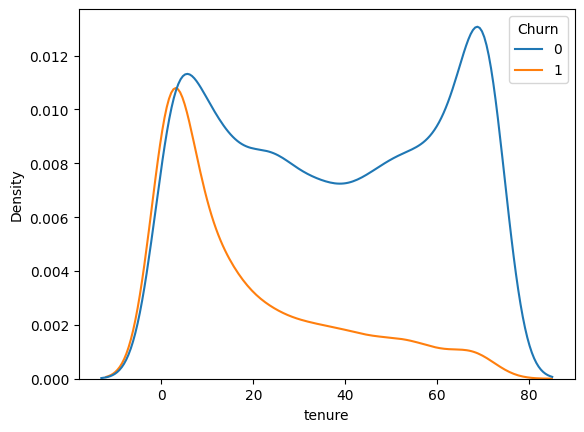

O
0.83


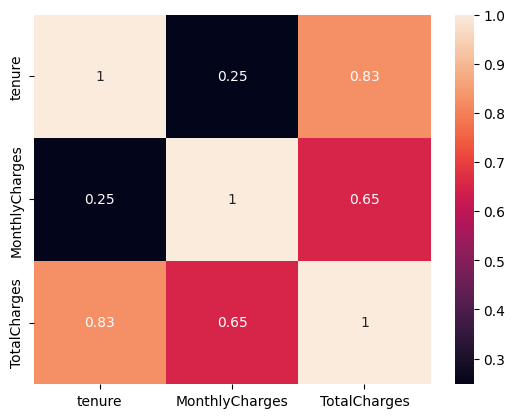

In [148]:
# 여기에 답안코드를 작성하세요.

import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(x='tenure',data=df4)
plt.show()

sns.kdeplot(x='tenure',hue='Churn',data=df4)
plt.show()

print('O')

target = ['tenure','MonthlyCharges','TotalCharges']

sns.heatmap(df4[target].corr(), annot=True)

print(0.83)

<br>

### 10. df4에서 컬럼의 데이터 타입이 object인 컬럼들을 원-핫 인코딩하세요.
* 컬럼의 데이터 타입이 object인 컬럼들을 object_cols 변수에 저장하세요.
* object_cols 변수의 컬럼들을 원-핫 인코딩하세요.
* 전처리된 데이터를 df5에 저장하세요.

In [149]:
# 여기에 답안코드를 작성하세요.

object_cols = df4.select_dtypes(include = 'object').columns

df5 = pd.get_dummies(data=df4 , columns=object_cols ,drop_first=True)
df5.head()



,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1,34,56.95,1889.50,0,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2,53.85,108.15,1,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,1840.75,0,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,2,70.70,151.65,1,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
5,8,99.65,820.50,1,False,False,False,True,False,True,...,False,True,False,True,False,False,True,False,True,False


<br>

### 11. df5에 대해 Scikit-learn의 train_test_split 함수로 훈련, 검증 데이터를 분리하세요.
* 입력 : X, y (y에는 churn을 저장하고 X에는 churn을 제외한 나머지를 저장하세요)
* Train : Test 비율 = 8:2
* y Class 비율에 맞게 나누는 옵션을 추가하세요.
* random_state=42 로 설정하세요.
* 결과 : X_train, X_valid, y_train, y_valid에 저장하세요.

In [150]:
# 여기에 답안코드를 작성하세요.
target = 'Churn'

X = df5.drop(columns=target)
y = df5[target]

from sklearn.model_selection import train_test_split

X_train, X_valid , y_train,y_valid =train_test_split(X,y,stratify = y ,test_size = 0.2 , random_state =42)

<br>

### 12. MinMaxScaler 함수를 'scaler'로 정의하고 데이터를 정규화하세요.

In [151]:
# 여기에 답안코드를 작성하세요.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

<br>

### 13. 고객 이탈 여부를 예측하는 머신러닝 모델을 만들려고 합니다.
### 아래 가이드에 따라 모델링하고 학습을 진행하세요.
* LogisticRegression 모델 정의하고 학습시키세요. 
* KNN으로 모델을 정의하고 학습시키세요. (n_neighbors=5)
* Decision Tree로 모델을 정의하고 학습시키세요. (max_depth=10, random_state=42)
* RandomForest로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)
* XGBoost로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)  
* Light GBM으로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)  
* 각각 다른 셀에 답안코드를 작성하세요.

In [152]:
# 여기에 답안코드를 작성하세요.
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

lg.fit(X_train,y_train)

LogisticRegression()

In [153]:
# 여기에 답안코드를 작성하세요.
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [154]:
# 여기에 답안코드를 작성하세요.
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=10 , random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [155]:
# 여기에 답안코드를 작성하세요.
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=3,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=3, random_state=42)

In [156]:
# 여기에 답안코드를 작성하세요.
!pip install xgboost

from xgboost.sklearn import XGBClassifier 

xgb = XGBClassifier(n_estimators = 3 , random_state = 42)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=3, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [157]:
# 여기에 답안코드를 작성하세요.
! pip install lightgbm

from lightgbm.sklearn import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=3, random_state=42)
lgbm.fit(X_train,y_train)

LGBMClassifier(n_estimators=3, random_state=42)

### 14. 바로 위 Light GBM 모델의 성능을 평가하려고 합니다. 
### y값을 예측하여 confusion matrix를 구하고 heatmap 그래프로 시각화하세요. 
### 그리고 Scikit-learn의 classification_report를 활용하여 성능을 출력하세요.

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1033
           1       0.00      0.00      0.00       373

    accuracy                           0.73      1406
   macro avg       0.37      0.50      0.42      1406
weighted avg       0.54      0.73      0.62      1406



c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


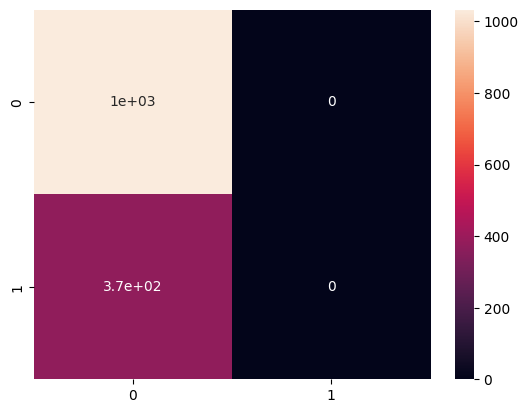

In [158]:
# 여기에 답안코드를 작성하세요.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred = lgbm.predict(X_valid)

sns.heatmap(confusion_matrix(y_valid,y_pred), annot=True)

print(classification_report(y_valid, y_pred))

##### **<span style="color:red">다음 문항을 풀기 전에</span> 아래 코드를 실행하세요.**

In [159]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

tf.random.set_seed(1)

### 15. 고객 이탈여부를 예측하는 딥러닝 모델을 만들려고 합니다.
### 아래 가이드에 따라 모델링하고 학습을 진행하세요.
* Tensoflow framework를 사용하여 딥러닝 모델을 만드세요.
* 히든레이어(hidden layer) 2개이상으로 모델을 구성하세요.
* dropout 비율 0.2로 Dropout 레이어 1개를 추가해 주세요.
* 하이퍼파라미터 epochs: 30, batch_size: 16으로 설정해주세요.
* 각 에포크마다 loss와 metrics 평가하기 위한 데이터로 X_valid, y_valid 사용하세요.
* 학습정보는 history 변수에 저장해주세요

In [165]:
# 여기에 답안코드를 작성하세요.
# 이탈여부는 이진분류  2 
model = Sequential()
model.add(Dense(128, activation='relu',input_shape = (X_train.shape[1],)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.2))
# 출력층층
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer ='adam', loss ='binary_crossentropy',metrics = ['accuracy'])

history = model.fit(X_train,y_train, validation_data = (X_valid,y_valid), epochs = 30 , batch_size=16)

Epoch 1/30


c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7353 - loss: 0.5247 - val_accuracy: 0.7838 - val_loss: 0.4503
Epoch 2/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7850 - loss: 0.4422 - val_accuracy: 0.7881 - val_loss: 0.4352
Epoch 3/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7971 - loss: 0.4317 - val_accuracy: 0.7866 - val_loss: 0.4348
Epoch 4/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7985 - loss: 0.4322 - val_accuracy: 0.7916 - val_loss: 0.4290
Epoch 5/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8007 - loss: 0.4265 - val_accuracy: 0.7923 - val_loss: 0.4288
Epoch 6/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8041 - loss: 0.4189 - val_accuracy: 0.7881 - val_loss: 0.4285
Epoch 7/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8052 - loss: 0.4147 - val_accuracy: 0.7945 - val_loss: 0.4319
Epoch 8/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8010 - loss: 0.4232 - val_accuracy: 0.7952 - val_

<br>

### 16. 위 딥러닝 모델의 성능을 평가하려고 합니다.
### Matplotlib 라이브러리 활용해서 학습 accuracy와 검증 accuracy를 그래프로 표시하세요.
* 1개의 그래프에 학습 accuracy와 검증 accuracy 2가지를 모두 표시하세요.
* 위 2가지 각각의 범례를 'acc', 'val_acc'로 표시하세요.
* 그래프의 타이틀은 'Accuracy'로 표시하세요.
* X축에는 'Epochs'라고 표시하고 Y축에는 'Acc'라고 표시하세요.

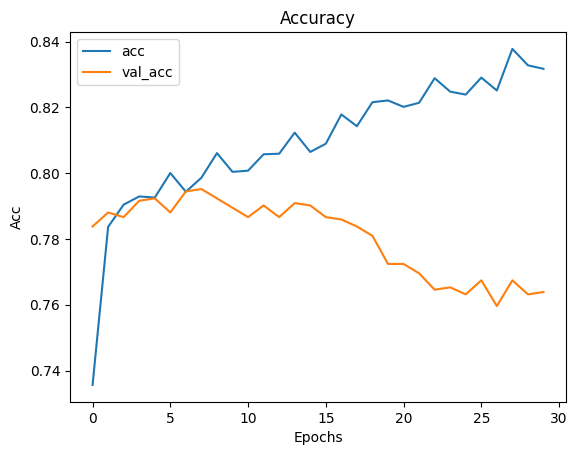

In [166]:
# 여기에 답안코드를 작성하세요.

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['acc','val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.show()

### [선택] 모든 과정을 수행한 후에는 머신러닝, 딥러닝 모델의 성능을 향상시켜보세요.